In [1]:
import seaborn as sns
print(sns.__version__)

0.9.0


In [2]:
import pandas as pd
import numpy as np

In [3]:
!pwd

/Users/test/codegitriz/rizvi-kth/python-cronicals/ML/Corona_Case/notebooks


In [125]:
d1_pdf = pd.read_csv("../data/corona_01.csv")
d2_pdf = pd.read_csv("../data/corona_02.csv")
d3_pdf = pd.read_csv("../data/corona_03.csv")
d4_pdf = pd.read_csv("../data/corona_04.csv")



In [126]:
##cr_pdf = pd.concat([d1_pdf,d2_pdf,d3_pdf,d4_pdf], axis=1)


In [135]:
#filtered1_pdf = d1_pdf.sort_values(by="Country")[1:]
aus01_pdf = d1_pdf[d1_pdf['Country']=='Sweeden']
aus01_pdf

,Country,January 29 cases,February 9 2020 cases,February 11 cases,February 18 cases,Feb. 20 cases,Feb. 21 cases,Feb. 22 cases,Feb. 23 cases,Feb. 24 cases,Unnamed: 10,Total deaths (Feb 15),Total deaths (Feb 18),T.D. Feb 19,T.D. Feb 20,T.D. Feb 21,T.D. Feb 22,T.D. Feb 23,T.D. Feb 24
28,Sweeden,0,0,0,0,1,1,1,1,1,NaN,0,0,0,0,0,0,0,0


In [136]:
#filtered1_pdf = d1_pdf.sort_values(by="Country")[1:]
aus02_pdf = d2_pdf[d2_pdf['Country']=='Sweeden']
aus02_pdf

,Country,Feb. 24 cases,Feb. 25 cases,Feb. 26 cases,Feb. 27 cases,Feb. 28 cases,Feb. 29 cases,Mar. 01 cases,Mar. 02 cases,Mar. 03 cases,...,T.D. Mar. 06,T.D. Mar. 07,T.D. Mar. 09,Unnamed: 30,T.Recov. Feb. 26,T.Recov. Feb. 29,T.Recov. Mar. 02,T.Recov. Mar. 05,T.Recov. Mar. 07,T.Recov. Mar. 09
98,Sweeden,1,1,1,2,2,11,13,14,24,...,0,0,0,NaN,0,0,0,1,1,1


In [137]:
#filtered1_pdf = d1_pdf.sort_values(by="Country")[1:]
aus03_pdf = d3_pdf[d3_pdf['Country']=='Sweeden']
aus03_pdf

,Country,Mar. 07 cases,Mar. 09 cases,Mar. 11 cases,Mar. 13 cases,Mar. 14 cases,Mar. 15 cases,Mar. 16 cases,Mar. 17 cases,Mar. 18 cases,...,T.Recov. Mar. 20,T.Recov. Mar. 21,T.Recov. Mar. 22,T.Recov. Mar. 23,T.Recov. Mar. 24,T.Recov. Mar. 25,T.Recov. Mar. 26,T.Recov. Mar. 27,T.Recov. Mar. 28,T.Recov. Mar. 29
177,Sweeden,137,203,436,688,821,961,"1,040","1,125","1,292",...,16,16,16,16,16,16,16,16,16,16


In [138]:
#filtered1_pdf = d1_pdf.sort_values(by="Country")[1:]
aus04_pdf = d4_pdf[d4_pdf['Country']=='Sweeden']
aus04_pdf

,Country,Mar. 29 cases,Mar. 30 cases,Unnamed: 3,T.D. Mar. 29,T.D. Mar. 30,Unnamed: 6,T.Recov. Mar. 29,T.Recov. Mar. 30
177,Sweeden,"3,447","4,028",NaN,105,146,NaN,16,16


In [139]:
def split_cases(aus03_pdf):
    aus03_pdf = aus03_pdf.T

    aus03_pdf = aus03_pdf.reset_index()

    aus03_pdf = aus03_pdf.rename(columns=aus03_pdf.iloc[0])
    # aus03_pdf = aus03_pdf.rename(columns={'Country':'Case'}) 
    aus03_pdf.columns = ['Case', 'Count']

    aus03_pdf = aus03_pdf.dropna()

    aus03_pdf = aus03_pdf[1:]

    aus03_inf_pdf = aus03_pdf[aus03_pdf['Case'].str.contains("case")]
    aus03_dth_pdf = aus03_pdf[aus03_pdf['Case'].str.contains("T.D.")]
    aus03_rco_pdf = aus03_pdf[aus03_pdf['Case'].str.contains("Recov")]
    
    return (aus03_inf_pdf, aus03_dth_pdf, aus03_rco_pdf)

In [140]:
#filtered1_pdf = d1_pdf.sort_values(by="Country")[1:]
#aus01_pdf = d1_pdf.sort_values(by="Country")[1:2]
(aus01_inf_pdf, aus01_dth_pdf, aus01_rco_pdf) = split_cases(aus01_pdf)
print(f"Total case {len(aus01_pdf.T)} with {len(aus01_inf_pdf)} infected, {len(aus01_dth_pdf)} dead and {len(aus01_rco_pdf)} recovered.")


Total case 19 with 9 infected, 6 dead and 0 recovered.


In [141]:
#filtered2_pdf = d2_pdf.sort_values(by="Country")
#aus02_pdf = filtered2_pdf[6:7] ## 
(aus02_inf_pdf, aus02_dth_pdf, aus02_rco_pdf) = split_cases(aus02_pdf)
print(f"Total case {len(aus02_pdf.T)} with {len(aus02_inf_pdf)} infected, {len(aus02_dth_pdf)} dead and {len(aus02_rco_pdf)} recovered.")


Total case 37 with 14 infected, 14 dead and 6 recovered.


In [142]:
#filtered3_pdf = d3_pdf.sort_values(by="Country")
#aus03_pdf = filtered3_pdf[10:11]
(aus03_inf_pdf, aus03_dth_pdf, aus03_rco_pdf) = split_cases(aus03_pdf)
print(f"Total case {len(aus03_pdf.T)} with {len(aus03_inf_pdf)} infected, {len(aus03_dth_pdf)} dead and {len(aus03_rco_pdf)} recovered.")

Total case 62 with 21 infected, 20 dead and 18 recovered.


In [143]:
#filtered4_pdf = d4_pdf.sort_values(by="Country")
#aus04_pdf = filtered4_pdf[10:11]
(aus04_inf_pdf, aus04_dth_pdf, aus04_rco_pdf) = split_cases(aus04_pdf)
print(f"Total case {len(aus04_pdf.T)} with {len(aus04_inf_pdf)} infected, {len(aus04_dth_pdf)} dead and {len(aus04_rco_pdf)} recovered.")

Total case 9 with 2 infected, 2 dead and 2 recovered.


### Process infected

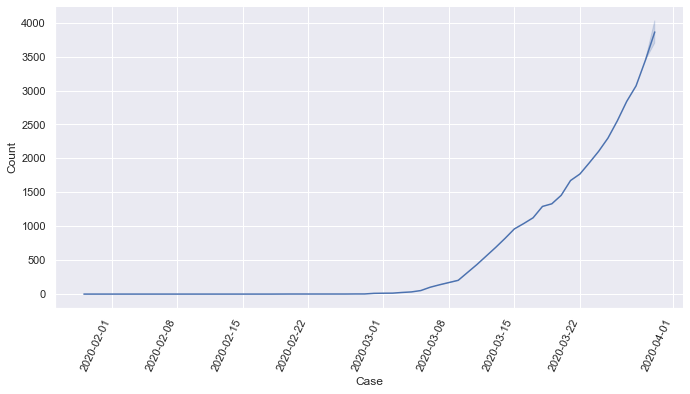

In [173]:
aus_inf_pdf = pd.concat([aus01_inf_pdf,aus02_inf_pdf,aus03_inf_pdf,aus04_inf_pdf], axis=0)
aus_inf_pdf = aus_inf_pdf.reset_index(drop=True)
aus_inf_pdf.dtypes

aus_inf_pdf["Count"] = aus_inf_pdf["Count"].str.replace(",", "")
aus_inf_pdf["Count"] = pd.to_numeric(aus_inf_pdf["Count"])

aus_inf_pdf["Case"] = aus_inf_pdf["Case"].str.replace(" ", "")
aus_inf_pdf["Case"] = aus_inf_pdf["Case"].str.replace("cases", "")
aus_inf_pdf["Case"] = aus_inf_pdf["Case"].str.replace("February92020", "Feb.09")
aus_inf_pdf["Case"] = aus_inf_pdf["Case"].str.replace("January", "01")
aus_inf_pdf["Case"] = aus_inf_pdf["Case"].str.replace("February", "02")
aus_inf_pdf["Case"] = aus_inf_pdf["Case"].str.replace("Feb", "02")
aus_inf_pdf["Case"] = aus_inf_pdf["Case"].str.replace("Mar", "03")
aus_inf_pdf["Case"] = aus_inf_pdf["Case"].str.replace(".", "")

aus_inf_pdf["Case"] = aus_inf_pdf["Case"].astype(str)
aus_inf_pdf["Case"] = "2020" + aus_inf_pdf["Case"] + " 00:00:00"
aus_inf_pdf["Case"] = pd.to_datetime(aus_inf_pdf["Case"], format='%Y%m%d %H:%M:%S')

aus_inf_pdf

sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.relplot(x="Case", y="Count", ci=95, kind="line", aspect=2, data=aus_inf_pdf);
ax.set_xticklabels(rotation=65, horizontalalignment='right');

### Process death

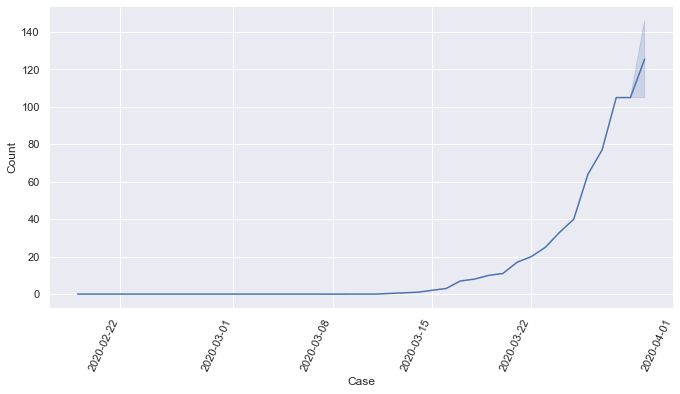

In [172]:
aus_dth_pdf = pd.concat([aus01_dth_pdf,aus02_dth_pdf,aus03_dth_pdf,aus04_dth_pdf], axis=0)
aus_dth_pdf = aus_dth_pdf.reset_index(drop=True)
aus_dth_pdf.dtypes

aus_dth_pdf["Count"] = aus_dth_pdf["Count"].str.replace(",", "")
aus_dth_pdf["Count"] = pd.to_numeric(aus_dth_pdf["Count"])
aus_dth_pdf["Case"] = aus_dth_pdf["Case"].str.replace(" ", "")
aus_dth_pdf["Case"] = aus_dth_pdf["Case"].str.replace("T.D.", "")

aus_dth_pdf["Case"] = aus_dth_pdf["Case"].str.replace("Feb", "02")
aus_dth_pdf["Case"] = aus_dth_pdf["Case"].str.replace("Mar", "03")
aus_dth_pdf["Case"] = aus_dth_pdf["Case"].str.replace(".", "")
aus_dth_pdf

aus_dth_pdf["Case"] = aus_dth_pdf["Case"].astype(str)
aus_dth_pdf["Case"] = "2020" + aus_dth_pdf["Case"] + " 00:00:00"
#aus_dth_pdf

aus_dth_pdf["Case"] = pd.to_datetime(aus_dth_pdf["Case"], format='%Y%m%d %H:%M:%S')

sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.relplot(x="Case", y="Count", ci=95, kind="line", aspect=2, data=aus_dth_pdf);
ax.set_xticklabels(rotation=65, horizontalalignment='right');



### Process recovered

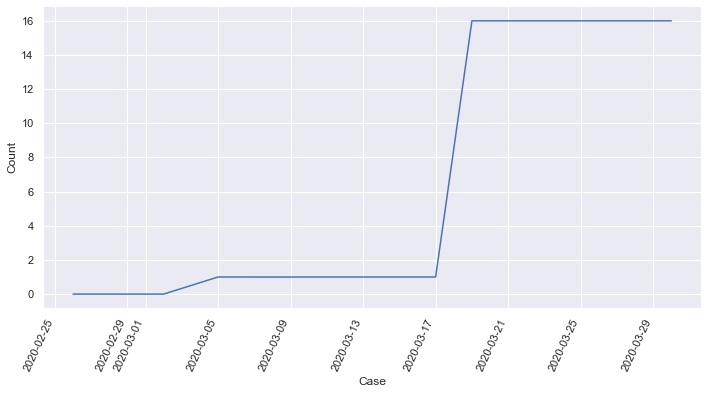

In [171]:
aus_rco_pdf = pd.concat([aus01_rco_pdf,aus02_rco_pdf,aus03_rco_pdf,aus04_rco_pdf], axis=0)
aus_rco_pdf = aus_rco_pdf.reset_index(drop=True)

aus_rco_pdf.dtypes

aus_rco_pdf["Count"] = aus_rco_pdf["Count"].str.replace(",", "")
aus_rco_pdf["Count"] = pd.to_numeric(aus_rco_pdf["Count"])

aus_rco_pdf["Case"] = aus_rco_pdf["Case"].str.replace(" ", "")
aus_rco_pdf["Case"] = aus_rco_pdf["Case"].str.replace("T.Recov.", "")
aus_rco_pdf["Case"] = aus_rco_pdf["Case"].str.replace("Feb", "02")
aus_rco_pdf["Case"] = aus_rco_pdf["Case"].str.replace("Mar", "03")
aus_rco_pdf["Case"] = aus_rco_pdf["Case"].str.replace(".", "")
aus_rco_pdf["Case"] = aus_rco_pdf["Case"].str.replace("Feb", "02")
aus_rco_pdf["Case"] = aus_rco_pdf["Case"].str.replace("Mar", "03")
aus_rco_pdf["Case"] = aus_rco_pdf["Case"].str.replace(".", "")
aus_rco_pdf["Case"] = aus_rco_pdf["Case"].astype(str)
aus_rco_pdf["Case"] = "2020" + aus_rco_pdf["Case"] + " 00:00:00"
#aus_rco_pdf

aus_rco_pdf["Case"] = pd.to_datetime(aus_rco_pdf["Case"], format='%Y%m%d %H:%M:%S')

sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.relplot(x="Case", y="Count", ci=95, kind="line", aspect=2, data=aus_rco_pdf);
ax.set_xticklabels(rotation=65, horizontalalignment='right');

### Infected vs Death

In [162]:
aus_inf_pdf["Status"] = "Infected"
aus_dth_pdf["Status"] = "Death"
aus_rco_pdf["Status"] = "Recovered"


In [163]:
aus_all_pdf = pd.concat([aus_inf_pdf,aus_dth_pdf,aus_rco_pdf], axis=0)
aus_all_pdf

,Case,Count,Status
0,2020-01-29,0,Infected
1,2020-02-09,0,Infected
2,2020-02-11,0,Infected
3,2020-02-18,0,Infected
4,2020-02-20,1,Infected
...,...,...,...
21,2020-03-27,16,Recovered
22,2020-03-28,16,Recovered
23,2020-03-29,16,Recovered
24,2020-03-29,16,Recovered


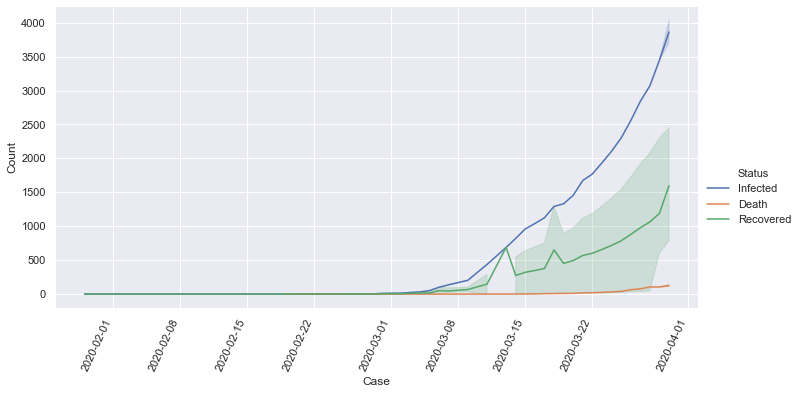

In [170]:
#sns.relplot(x="Case", y="Count", hue="Status", kind="line", estimator=None, data=aus_all_pdf);

sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.relplot(x="Case", y="Count", hue="Status", kind="line", ci=80, aspect=2, data=aus_all_pdf);
ax.set_xticklabels(rotation=65, horizontalalignment='right');

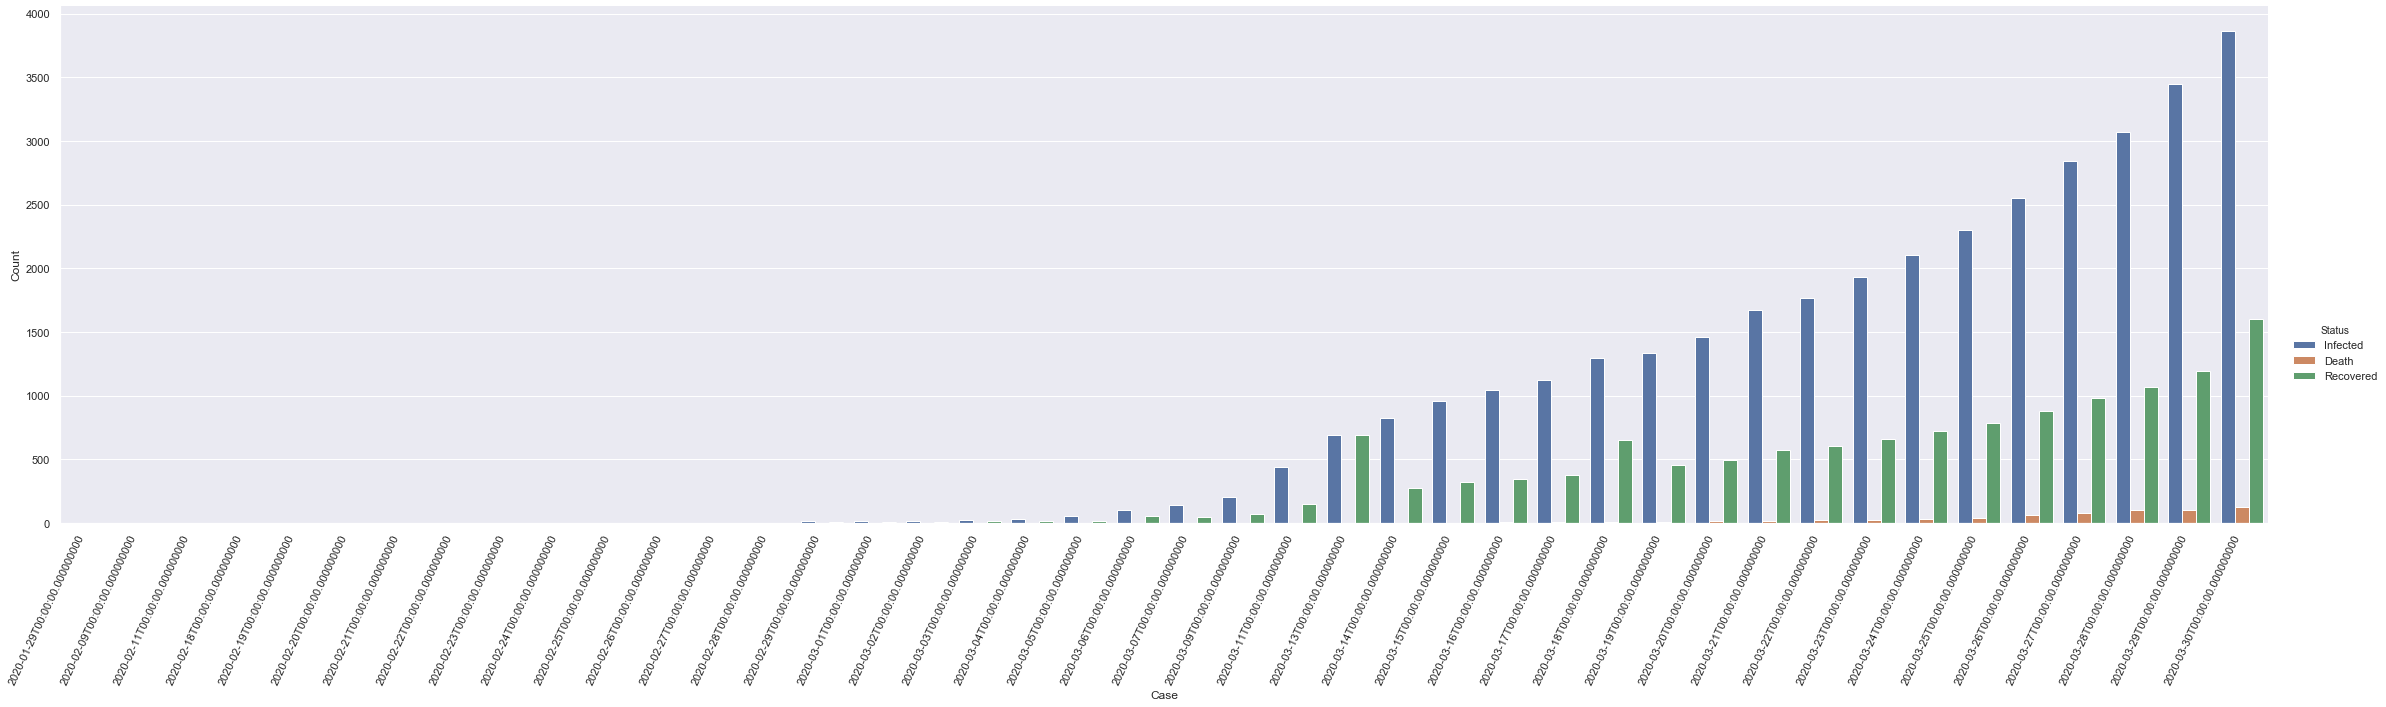

In [184]:
#sns.catplot(x="Case", kind="count", hue="Status", palette="ch:.25", data=aus_all_pdf);
sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.catplot(x="Case", y="Count", hue="Status", kind="bar", ci=None, height=8,aspect=4, data=aus_all_pdf);
ax.set_xticklabels(rotation=65, horizontalalignment='right');